In [1]:
import pandas as pd
import numpy as np
import pickle

# Neural Nets: 

Artificial neural networks, usually simply called neural networks, are computing systems inspired by the biological neural networks that constitute animal brains. 

### Simple Layer Neural Nets:
   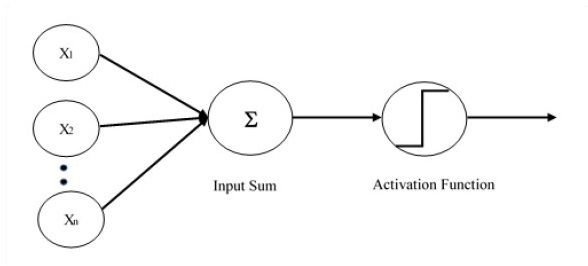
   
   Single layer perceptron is the first proposed neural model created. The content of the local memory of the neuron consists of a vector of weights. The computation of a single layer perceptron is performed over the calculation of sum of the input vector each with the value multiplied by corresponding element of vector of the weights. The value which is displayed in the output will be the input of an activation function.
   
   Let us focus on the implementation of single layer perceptron for an image classification problem using TensorFlow. The best example to illustrate the single layer perceptron is through representation of “Logistic Regression”.
    
   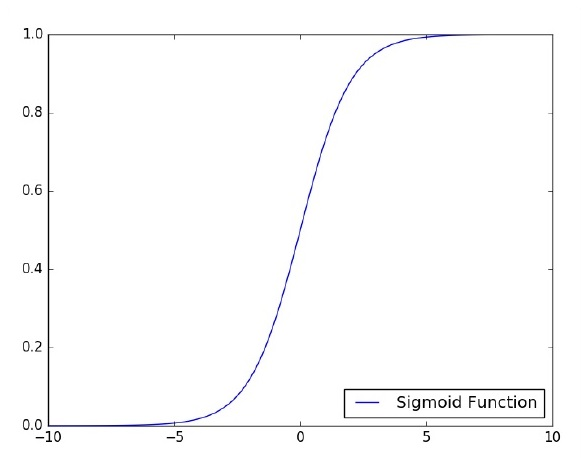


### Multiple Layer Neural Nets:
   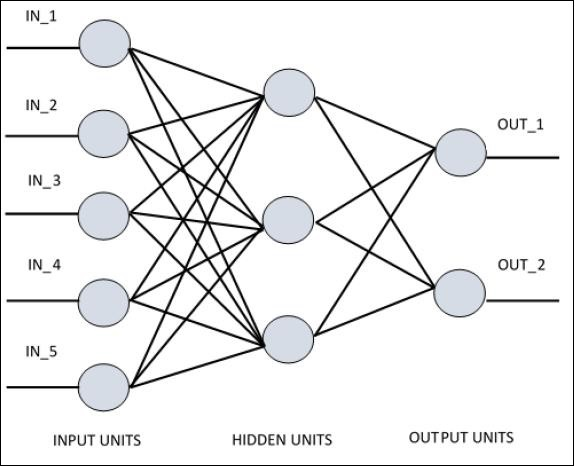
    
    A multi-layered perceptron consists of interconnected neurons transferring information to each other, much like the human brain. Each neuron is assigned a value. The network can be divided into three main layers.

In [2]:
with open('digits.txt','rb') as f:
    data = pickle.load(f)
X = data['data']
y = data['target']
dim = 8

In [3]:
X[0].reshape((dim,dim)), y[0]

(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]),
 0)

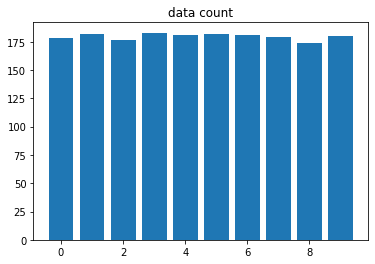

In [4]:
import matplotlib.pyplot as plt
num_count = pd.value_counts(y).sort_index()
plt.bar(list(num_count.index),list(num_count.values))
plt.title('data count')
plt.show()

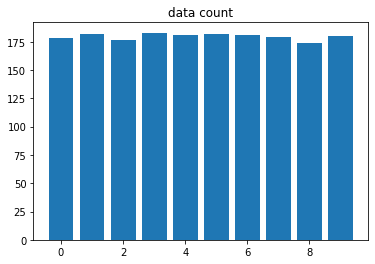

In [5]:
import matplotlib.pyplot as plt
num_count = pd.value_counts(y).sort_index()
plt.bar(list(num_count.index),list(num_count.values))
plt.title('data count')
plt.show()

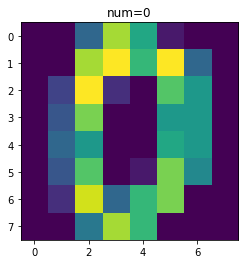

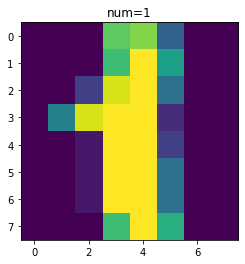

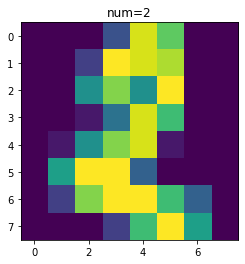

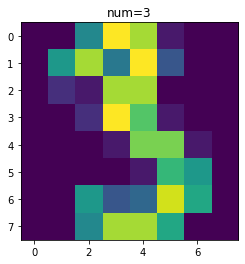

In [6]:
import matplotlib.pyplot as plt
for i in range(4):
    plt.imshow(X[i].reshape((dim,dim)))
    plt.title('num=%s'%y[i])
    plt.show()


In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

class myNeuralNet:
    def __init__(self):
        '''
        buildmodel
        '''
        self.clf = make_pipeline(
            StandardScaler(),
            MLPClassifier(hidden_layer_sizes=(128,128, ), activation='relu', solver='adam', alpha=0.0001, 
            batch_size=64, learning_rate='constant', learning_rate_init=0.01, max_iter=200, shuffle=True,
             random_state=0),
        )


    def train(self, X, y):
        '''
        train
        :param X:
        :param y:
        :return:
        '''
        self.clf = self.clf.fit(X, y)
        return self.clf

    def predict(self, X):
        '''
        predict
        :param X:
        :return:
        '''
        return self.clf.predict(X)
    
    def predict_prob(self, X):
        '''
        predict prob
        '''
        return self.clf.predict_proba(X)

In [8]:
def eval_result(y, pre_y):
    '''
    eval
    :param y:
    :param pre_y:
    :return:
    '''
    lables = list(set(y))
    result = dict()
    for l in lables:
        t_r = dict()
        TP = np.logical_and(y==pre_y, y==l).sum()
        FP = np.logical_and(y!=pre_y, y!=l).sum()
        FN = np.logical_and(y!=pre_y, y==l).sum()
        t_r['precision'] = TP/(TP+FP)
        t_r['recall'] = TP/(TP+FN)
        t_r['F1'] = 2*t_r['precision']*t_r['recall']/(t_r['precision']+t_r['recall'])

        result[l] = t_r
    return result

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)

In [10]:
model = myNeuralNet()
model.train(X_train,y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(batch_size=64, hidden_layer_sizes=(128, 128),
                               learning_rate_init=0.01, random_state=0))])

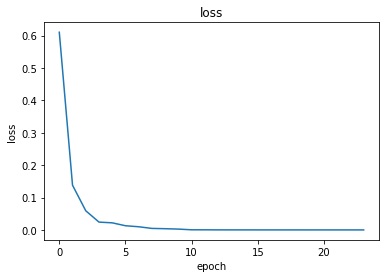

In [11]:
loss_save = model.clf.steps[1][1].loss_curve_
plt.plot(loss_save)
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [12]:
pre_y_train = model.predict(X_train)
eval_train = eval_result(y_train, pre_y_train)
eval_train

{0: {'precision': 1.0, 'recall': 1.0, 'F1': 1.0},
 1: {'precision': 1.0, 'recall': 1.0, 'F1': 1.0},
 2: {'precision': 1.0, 'recall': 1.0, 'F1': 1.0},
 3: {'precision': 1.0, 'recall': 1.0, 'F1': 1.0},
 4: {'precision': 1.0, 'recall': 1.0, 'F1': 1.0},
 5: {'precision': 1.0, 'recall': 1.0, 'F1': 1.0},
 6: {'precision': 1.0, 'recall': 1.0, 'F1': 1.0},
 7: {'precision': 1.0, 'recall': 1.0, 'F1': 1.0},
 8: {'precision': 1.0, 'recall': 1.0, 'F1': 1.0},
 9: {'precision': 1.0, 'recall': 1.0, 'F1': 1.0}}

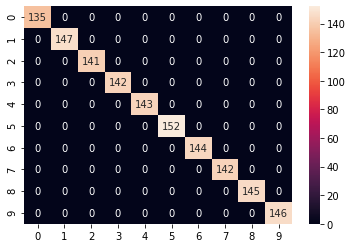

In [13]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def confusion_matrix(y_true, y_pred, labels=None, save_path = './confusion_matrix.jpg'):
    n = len(labels)
    labels_dict = {label: i for i, label in enumerate(labels)}
    res = np.zeros([n, n], dtype=np.int32)
    for gold, predict in zip(y_true, y_pred):
        res[labels_dict[gold]][labels_dict[predict]] += 1

    df = pd.DataFrame(res, index=labels, columns=labels)
    sns.heatmap(df, annot=True, fmt='d')
    plt.savefig(save_path)
    plt.show()

confusion_matrix(y_train, pre_y_train, list(range(10)), save_path='./train_confusion_matrix.jpg')

In [14]:
pre_y_test = model.predict(X_test)
prob_y_test = model.predict_prob(X_test)
eval_test = eval_result(y_test, pre_y_test)
eval_test

{0: {'precision': 0.8775510204081632, 'recall': 1.0, 'F1': 0.9347826086956522},
 1: {'precision': 0.8536585365853658, 'recall': 1.0, 'F1': 0.9210526315789475},
 2: {'precision': 0.8947368421052632,
  'recall': 0.9444444444444444,
  'F1': 0.918918918918919},
 3: {'precision': 0.8723404255319149, 'recall': 1.0, 'F1': 0.9318181818181819},
 4: {'precision': 0.8636363636363636, 'recall': 1.0, 'F1': 0.9268292682926829},
 5: {'precision': 0.8529411764705882,
  'recall': 0.9666666666666667,
  'F1': 0.90625},
 6: {'precision': 0.8604651162790697, 'recall': 1.0, 'F1': 0.9249999999999999},
 7: {'precision': 0.8780487804878049,
  'recall': 0.972972972972973,
  'F1': 0.923076923076923},
 8: {'precision': 0.8484848484848485,
  'recall': 0.9655172413793104,
  'F1': 0.9032258064516129},
 9: {'precision': 0.868421052631579,
  'recall': 0.9705882352941176,
  'F1': 0.9166666666666667}}

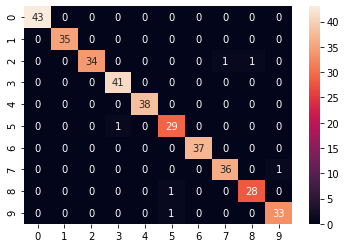

In [15]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def confusion_matrix(y_true, y_pred, labels=None, save_path = './confusion_matrix.jpg'):
    n = len(labels)
    labels_dict = {label: i for i, label in enumerate(labels)}
    res = np.zeros([n, n], dtype=np.int32)
    for gold, predict in zip(y_true, y_pred):
        res[labels_dict[gold]][labels_dict[predict]] += 1

    df = pd.DataFrame(res, index=labels, columns=labels)
    sns.heatmap(df, annot=True, fmt='d')
    plt.savefig(save_path)
    plt.show()

confusion_matrix(y_test, pre_y_test, list(range(10)), save_path='./test_confusion_matrix.jpg')

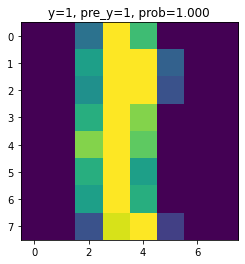

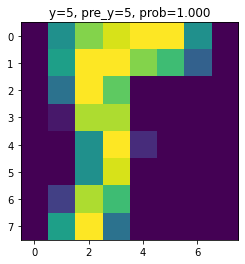

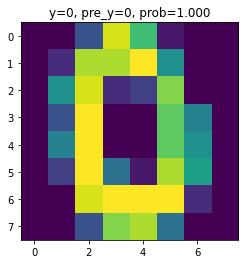

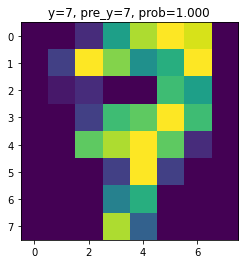

In [16]:
for i in range(4):
    plt.imshow(X_test[i].reshape((dim,dim)))
    plt.title('y=%s, pre_y=%s, prob=%.3f'%(y_test[i], pre_y_test[i], prob_y_test[i][y_test[i]]))
    plt.show()